In [1]:
import pandas as pd
import numpy as np

In [2]:
def p_value_stars(p):

    if p > 0.05:
        return 'ns'

    elif (p <= 0.05) and (p>0.01):
        return '*'
    elif (p <= 0.01) and (p>0.001):
        return '**'
    elif (p <= 0.001) and (p>0.0001):
        return '***'
    elif (p<= 0.0001):
        return '****'




In [3]:
df_raw = pd.read_excel('HHIP KD Scratch all qPCR 240408.xlsx')
df_raw

,Repeats,Sample,Target,CT
0,1,Control siRNA,HHIP,32.84
1,NaN,Control siRNA,HHIP,32.233
2,2,Control siRNA - well 1,HHIP,33.909
3,NaN,Control siRNA - well 1,HHIP,33.007
4,NaN,Control siRNA- well 2,HHIP,33.27
...,...,...,...,...
110,NaN,HHIP siRNA,GAPDH,18.234
111,2,HHIP siRNA - well 1,GAPDH,21.885
112,NaN,HHIP siRNA - well 1,GAPDH,21.895
113,NaN,HHIP siRNA - well 2,GAPDH,21.962


In [4]:
set(df_raw['Sample'])

{'Control siRNA',
 'Control siRNA - well 1',
 'Control siRNA-  well 2',
 'Control siRNA- well 2',
 'HHIP siRNA',
 'HHIP siRNA -  well 1',
 'HHIP siRNA - well 1',
 'HHIP siRNA - well 2',
 'Sample',
 nan}

In [5]:
column_remapping= {'Control siRNA': (0, 'Control siRNA'),  
 'Control siRNA - well 1': (1, 'Control siRNA'),  
 'Control siRNA-  well 2': (2, 'Control siRNA'),  
 'Control siRNA- well 2': (2, 'Control siRNA'),  
 'HHIP siRNA':(0, 'HHIP siRNA'),
 'HHIP siRNA -  well 1':(1, 'HHIP siRNA'),
 'HHIP siRNA - well 1':(1, 'HHIP siRNA'),
 'HHIP siRNA - well 2':(2, 'HHIP siRNA'),
 'Sample':np.nan}

In [6]:
df=pd.DataFrame()
for i,row in df_raw.iterrows():
    new_row = {}
    
    if (row['Sample'] == 'Sample') or (pd.isna(row['Sample'])):
        continue
    
    new_row['Repeat'] = column_remapping[row['Sample']][0]
    new_row['Sample'] = column_remapping[row['Sample']][1]
    new_row['Target Gene'] = row['Target']
    new_row['Ct'] = row['CT']
    
    df=pd.concat([df, pd.DataFrame([new_row])],ignore_index=True)

    
    

In [7]:
df

,Repeat,Sample,Target Gene,Ct
0,0,Control siRNA,HHIP,32.840
1,0,Control siRNA,HHIP,32.233
2,1,Control siRNA,HHIP,33.909
3,1,Control siRNA,HHIP,33.007
4,2,Control siRNA,HHIP,33.270
...,...,...,...,...
95,0,HHIP siRNA,GAPDH,18.234
96,1,HHIP siRNA,GAPDH,21.885
97,1,HHIP siRNA,GAPDH,21.895
98,2,HHIP siRNA,GAPDH,21.962


In [8]:
gb = df.groupby(by=['Repeat','Sample','Target Gene'])
df_all = gb.mean().reset_index()

In [9]:
#df = df[df.Repeat == 2 ]
#df

In [10]:
#experiment 0:

In [11]:
housekeeping_gene = 'GAPDH'
control = 'Control siRNA'
case = 'HHIP siRNA'

In [12]:
import scipy
genes = set(df_all['Target Gene'])-set([housekeeping_gene])

delta_Ct_dict_case = {}
delta_Ct_dict_control = {}
delta_delta_Ct_dict = {}

alt_hypotheses = {'HHIP': 'greater',
                  'CDH1': 'greater',
                  'CDH2': 'less',
                  'GLI1': 'greater',
                  'GLI2':'less',
                  'FN1': 'two-sided',
                  'ACTA2':'two-sided'}

for gene in genes:
    print(gene)
    delta_Ct_dict_case[gene] = []
    delta_Ct_dict_control[gene] = []
    delta_delta_Ct_dict[gene] = []
    
    for repeat in set(df_all.Repeat):
        df = df_all[df_all.Repeat == repeat ]
    
        delta_Ct_control = df[(df['Target Gene']==gene) & (df['Sample']==control)]['Ct'].values[0] - df[(df['Target Gene']==housekeeping_gene) & (df['Sample']==control)]['Ct'].values[0]
        delta_Ct_case = df[(df['Target Gene']==gene) & (df['Sample']==case)]['Ct'].values[0] - df[(df['Target Gene']==housekeeping_gene) & (df['Sample']==case)]['Ct'].values[0]
        delta_delta_Ct_dict[gene].append(delta_Ct_case - delta_Ct_control)
        delta_Ct_dict_control[gene].append(delta_Ct_control)
        delta_Ct_dict_case[gene].append(delta_Ct_case)

    print(scipy.stats.ttest_ind(delta_delta_Ct_dict[gene],[0 for i in range(len(delta_delta_Ct_dict[gene]))]))
    print(scipy.stats.ttest_rel(delta_Ct_dict_case[gene],delta_Ct_dict_control[gene]))#,alternative=alt_hypotheses[gene]))


FN1
TtestResult(statistic=-1.7441805441408416, pvalue=0.1560736707709499, df=4.0)
TtestResult(statistic=-1.7441805441408416, pvalue=0.22324710988424992, df=2)
GLI2
TtestResult(statistic=-5.504132333177185, pvalue=0.005313706109214402, df=4.0)
TtestResult(statistic=-5.504132333177185, pvalue=0.03145892429518333, df=2)
HHIP
TtestResult(statistic=6.162560674628436, pvalue=0.003519413143900248, df=4.0)
TtestResult(statistic=6.162560674628436, pvalue=0.025335223645710732, df=2)
CDH1
TtestResult(statistic=16.92221311118351, pvalue=7.149555280265567e-05, df=4.0)
TtestResult(statistic=16.92221311118351, pvalue=0.0034739057807858676, df=2)
ACTA2
TtestResult(statistic=-2.5853049257548864, pvalue=0.06098507927485251, df=4.0)
TtestResult(statistic=-2.5853049257548864, pvalue=0.12268242723536095, df=2)
GLI1
TtestResult(statistic=2.1537285249230713, pvalue=0.097572666322237, df=4.0)
TtestResult(statistic=2.1537285249230713, pvalue=0.16409974575254263, df=2)
CDH2
TtestResult(statistic=-4.150096353018

In [13]:
df_dd_Ct = pd.DataFrame(columns=['Gene','Delta delta Ct','Std Error', 'p_value','2^-ddCt','std 2^-ddCt'])
for k in ['HHIP','CDH1','CDH2','GLI1','GLI2','FN1','ACTA2']:
    v = delta_delta_Ct_dict[k]
    new_row = dict(zip(df_dd_Ct.columns,[k, np.mean(v), np.std(v)/np.sqrt(len(v)), scipy.stats.ttest_rel(delta_Ct_dict_case[k],delta_Ct_dict_control[k],alternative=alt_hypotheses[k])[1],np.mean(2**(-np.array(v))),np.std(2**(-np.array(v)))]))
    df_dd_Ct = pd.concat([df_dd_Ct,pd.DataFrame([new_row])],ignore_index=True)
df_dd_Ct['2^-ddCt_b'] = 2**(-df_dd_Ct['Delta delta Ct'])
df_dd_Ct

,Gene,Delta delta Ct,Std Error,p_value,2^-ddCt,std 2^-ddCt,2^-ddCt_b
0,HHIP,0.877167,0.116219,0.012668,0.549923,0.080096,0.544436
1,CDH1,0.593833,0.028652,0.001737,0.662970,0.022640,0.662580
2,CDH2,-0.781667,0.153786,0.026724,1.749517,0.336272,1.719116
3,GLI1,0.761167,0.288565,0.082050,0.625648,0.209389,0.590019
4,GLI2,-0.956833,0.141939,0.015729,1.970251,0.349633,1.941045
5,FN1,-0.328333,0.153701,0.223247,1.276760,0.229733,1.255562
6,ACTA2,-0.469333,0.148226,0.122682,1.407324,0.262704,1.384470


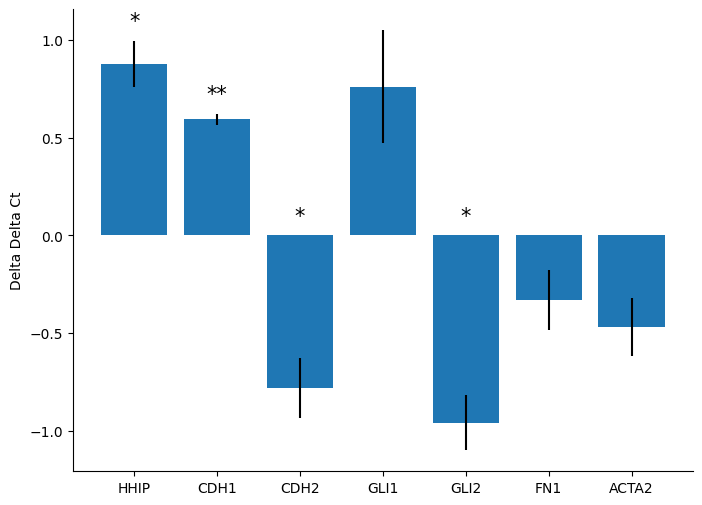

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=df_dd_Ct

plt.figure(figsize=(8,6))
plt.bar(range(len(df_dd_Ct)),df['Delta delta Ct'],yerr=df['Std Error'])
plt.xticks(range(len(df)),df['Gene'])
for i,p_value in enumerate(df['p_value']):
    if float(p_value) <=0.05:
        plt.text(x=i, y=max(df['Delta delta Ct'][i]+df['Std Error'][i]+0.1, 0.1), s=p_value_stars(p_value), ha='center', va='center', fontsize=15)
plt.ylabel('Delta Delta Ct')
sns.despine()

<Figure size 640x480 with 0 Axes>

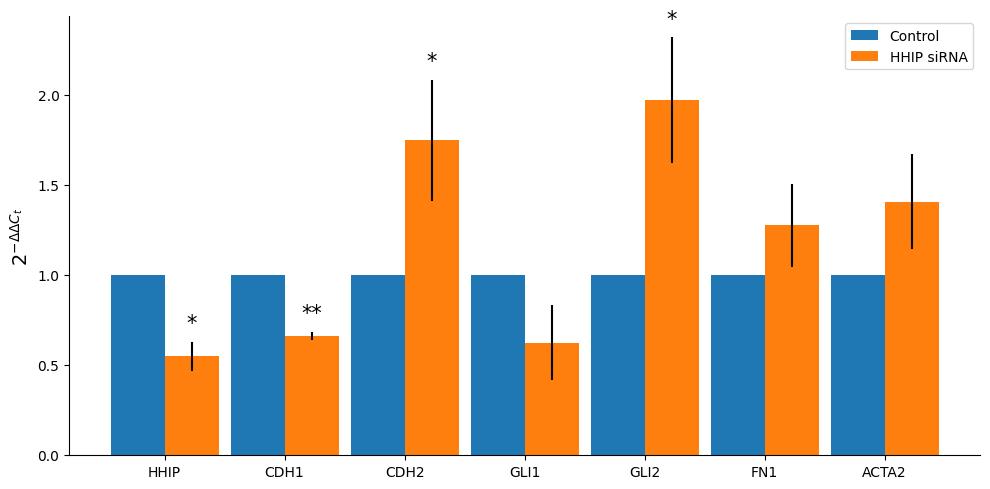

In [15]:
plt.figure()

labels = df.Gene
men_means =  [1 for i in range(len(df))]
women_means =df['2^-ddCt']

x = np.arange(len(labels))  # the label locations
width = 0.45  # the width of the bars

fig, ax = plt.subplots(figsize=(10,5))
rects1 = ax.bar(x - width/2, men_means, width, label='Control')
rects2 = ax.bar(x + width/2, women_means, width, label='HHIP siRNA', yerr = df['std 2^-ddCt'])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel(r'$2^{ - \Delta \Delta C_t}$',fontsize = 14)
#ax.set_title(r'$2^{ - \Delta \Delta C_t}$ values')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height() 
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


#autolabel(rects1)
#autolabel(rects2)

for i,p_value in enumerate(df['p_value']):
    if float(p_value) <=0.05:
        plt.text(x=i + width/2, y=max(df['2^-ddCt'][i]+df['std 2^-ddCt'][i]+0.1, 0.1), s=p_value_stars(p_value), ha='center', va='center', fontsize=15)

fig.tight_layout()
sns.despine()
plt.savefig('figures/Figure5B.png',dpi=300)
plt.savefig('figures/Figure5B.tiff',dpi=300)

In [26]:
pd.__version__

'1.3.5'

# GANT61, HHIP KD, no scratch

In [16]:
df_raw = pd.read_excel('HHIP-Scratch_GANT61 qpcr 1st-ANA.xlsx')
df_raw

,Sample,Target,CT,CT mean,∆CT,∆∆CT,2-∆∆CT,Unnamed: 7,Unnamed: 8,SAMPLE,HHIP GENE Expression
0,C-50-48 hrs,HHIP,32.303,32.3155,13.1205,0.0000,1.000000,NaN,NaN,Control siRNA-50pmole-48 hrs,1
1,C-50-48 hrs,HHIP,32.328,NaN,NaN,NaN,NaN,NaN,NaN,HHIP siRNA-50pmole-48 hrs,0.650896
2,HHIP-50-48 hrs,HHIP,33.118,33.0740,13.7400,0.6195,0.650896,NaN,NaN,Control siRNA-50pmole-72 hrs,1
3,HHIP-50-48 hrs,HHIP,33.030,NaN,NaN,NaN,NaN,NaN,NaN,HHIP siRNA-50pmole-72 hrs,0.530528
4,C-50-72 hrs,HHIP,31.292,31.2920,11.7210,0.0000,1.000000,NaN,NaN,Scratch-Control-29hrs,1
...,...,...,...,...,...,...,...,...,...,...,...
59,HHIP-50-72 hrs,GAPDH,19.043,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,S-C-29hrs,GAPDH,20.318,20.2510,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61,S-C-29hrs,GAPDH,20.184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62,S-GANT61-29hrs,GAPDH,20.176,20.1915,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
set(df_raw['Sample'])

{'C-50-48 hrs',
 'C-50-72 hrs',
 'HHIP-50-48 hrs',
 'HHIP-50-72 hrs',
 'S-C-29hrs',
 'S-GANT61-29hrs',
 nan}

In [18]:
column_remapping= {'C-50-48 hrs': (0, 'C-50-48 hrs'),  
 'C-50-72 hrs': (0, 'C-50-72 hrs',),  
 'HHIP-50-48 hrs': (0, 'HHIP-50-48 hrs'),  
 'HHIP-50-72 hrs': (0, 'HHIP-50-72 hrs'),  
 'S-C-29hrs':(0, 'S-C-29hrs'),
 'S-GANT61-29hrs':(0, 'S-GANT61-29hrs'),
 'Sample':np.nan}

In [19]:
df=pd.DataFrame()
for i,row in df_raw.iterrows():
    new_row = {}
    
    if (row['Sample'] == 'Sample') or (pd.isna(row['Sample'])):
        continue
    
    new_row['Repeat'] = column_remapping[row['Sample']][0]
    new_row['Sample'] = column_remapping[row['Sample']][1]
    new_row['Target Gene'] = row['Target']
    new_row['Ct'] = row['CT']
    
    df=pd.concat([df,pd.DataFrame([new_row])],ignore_index=True)

    

In [20]:
df

,Repeat,Sample,Target Gene,Ct
0,0,C-50-48 hrs,HHIP,32.303
1,0,C-50-48 hrs,HHIP,32.328
2,0,HHIP-50-48 hrs,HHIP,33.118
3,0,HHIP-50-48 hrs,HHIP,33.030
4,0,C-50-72 hrs,HHIP,31.292
5,0,C-50-72 hrs,HHIP,31.292
6,0,HHIP-50-72 hrs,HHIP,31.712
7,0,HHIP-50-72 hrs,HHIP,31.695
8,0,S-C-29hrs,HHIP,34.121
9,0,S-C-29hrs,HHIP,34.067


In [21]:
gb = df.groupby(by=['Repeat','Sample','Target Gene'])
df_all = gb.mean().reset_index()

In [22]:
gb = df.groupby(by=['Repeat','Sample','Target Gene'])
df_all = gb.mean().reset_index()

In [23]:
df_all

,Repeat,Sample,Target Gene,Ct
0,0,C-50-48 hrs,GAPDH,19.1950
1,0,C-50-48 hrs,Gli1,29.1670
2,0,C-50-48 hrs,Gli2,26.2925
3,0,C-50-48 hrs,HHIP,32.3155
4,0,C-50-48 hrs,SHH,32.0750
5,0,C-50-72 hrs,GAPDH,19.5710
6,0,C-50-72 hrs,Gli1,28.4450
7,0,C-50-72 hrs,Gli2,26.4125
8,0,C-50-72 hrs,HHIP,31.2920
9,0,C-50-72 hrs,SHH,30.9055


In [1]:
housekeeping_gene = 'GAPDH'
control_case_pairs = [('C-50-48 hrs','HHIP-50-48 hrs'),('C-50-72 hrs','HHIP-50-72 hrs'),('S-C-29hrs','S-GANT61-29hrs')]

In [2]:
import scipy

for control,case in control_case_pairs:

    genes = set(df_all['Target Gene'])-set([housekeeping_gene])

    delta_Ct_dict_case = {}
    delta_Ct_dict_control = {}
    delta_delta_Ct_dict = {}


    for gene in genes:
        print(gene)
        delta_Ct_dict_case[gene] = []
        delta_Ct_dict_control[gene] = []
        delta_delta_Ct_dict[gene] = []

        for repeat in set(df_all.Repeat):
            df = df_all[df_all.Repeat == repeat ]

            delta_Ct_control = df[(df['Target Gene']==gene) & (df['Sample']==control)]['Ct'].values[0] - df[(df['Target Gene']==housekeeping_gene) & (df['Sample']==control)]['Ct'].values[0]
            delta_Ct_case = df[(df['Target Gene']==gene) & (df['Sample']==case)]['Ct'].values[0] - df[(df['Target Gene']==housekeeping_gene) & (df['Sample']==case)]['Ct'].values[0]
            delta_delta_Ct_dict[gene].append(delta_Ct_case - delta_Ct_control)
            delta_Ct_dict_control[gene].append(delta_Ct_control)
            delta_Ct_dict_case[gene].append(delta_Ct_case)

        print(scipy.stats.ttest_ind(delta_delta_Ct_dict[gene],[0 for i in range(len(delta_delta_Ct_dict[gene]))]))
        print(scipy.stats.ttest_rel(delta_Ct_dict_case[gene],delta_Ct_dict_control[gene]))
        
    df_dd_Ct = pd.DataFrame(columns=['Gene','Delta delta Ct','Std Error', 'p_value','2^-ddCt','std 2^-ddCt'])
    for k in genes:
        v = delta_delta_Ct_dict[k]
        new_row = dict(zip(df_dd_Ct.columns,[k, np.mean(v), np.std(v)/np.sqrt(len(v)), scipy.stats.ttest_rel(delta_Ct_dict_case[k],delta_Ct_dict_control[k])[1],np.mean(2**(-np.array(v))),np.std(2**(-np.array(v)))]))
        df_dd_Ct = pd.concat([df_dd_Ct,pd.DataFrame([new_row])],ignore_index=True)
    df_dd_Ct['2^-ddCt_b'] = 2**(-df_dd_Ct['Delta delta Ct'])
    df_dd_Ct

    plt.figure()
    df=df_dd_Ct
    labels = df.Gene
    men_means =  [1 for i in range(len(df))]
    women_means =df['2^-ddCt']

    x = np.arange(len(labels))  # the label locations
    width = 0.45  # the width of the bars

    fig, ax = plt.subplots(figsize=(10,5))
    rects1 = ax.bar(x - width/2, men_means, width, label='Control')
    rects2 = ax.bar(x + width/2, women_means, width, label='HHIP siRNA', yerr = df['std 2^-ddCt'])

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel(r'$2^{ - \Delta \Delta C_t}$',fontsize = 14)
    #ax.set_title(r'$2^{ - \Delta \Delta C_t}$ values')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()
    ax.set_title(control+' vs '+case,fontsize=16 )

    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height() 
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')


    #autolabel(rects1)
    #autolabel(rects2)

    for i,p_value in enumerate(df['p_value']):
        if float(p_value) <=0.05:
            plt.text(x=i + width/2, y=max(df['2^-ddCt'][i]+df['std 2^-ddCt'][i]+0.1, 0.1), s=p_value_stars(p_value), ha='center', va='center', fontsize=15)

    fig.tight_layout()
    sns.despine()
    plt.savefig('figures/'+control+' vs '+case+'.png')
    plt.show()


NameError: name 'df_all' is not defined